# problem formulation:

### define the problem?

When preparing to list a new property on AirBnB, one of the main issues is figuring out how much to ask. The easiest method is, of course, to see how much other people are asking for an apartment or property identical to yours. We divide the pricing into three different bins for classification in order to create a deep learning model that will predict the category of the listing price rather than the actual price. To do this, a multi-model approach will be used, as the listing's information can be found in both the summary description and the uploaded images.

### what is the input?

We were given a dataset that included the listing's photos as well as a synopsis of each listing, which is text data in our case.Therefore, we will need to integrate what we have discovered from both the textual and visual data.


### what is the output?

Based on the created listing, we must determine which of the three categories—beginner, plus, or premium—the listing price will fall into. We designate these three groups, respectively, with 0, 1, and 2.additionally, we were requested to forecast the kind of listing.

### what is the data mining function required ?

- The classification function, which is the mining function employed in this challenge, was achieved by taking the following actions:
- **assemble the information**: we appreciate you doing this for us.
**Data cleaning and preprocessing**: This is a challenging task; I'll share the issue I ran into in the challenges section.

- **modeling**: characterize the task as a classification problem; choose an evaluation measure (in our case, accuracy); try many models with various hyperparameters and features; there are numerous deep learning architectures available, and transfer learning is also an option.
Model evaluation involves comparing the best scoring measure to determine which model is the best.

### what are the challenges?

 - As I previously stated, the data is extremely noisy, thus we must work on both text and picture data.
    - We must resize each image because they are all different sizes.
    Because there are so many summaries that are not in English, we must translate part of the summary records for the text data into English.

    One of the main issues I ran across was that the dataset was unbalanced, which prevented many models from identifying the patterns in class 2. Perhaps alternative, more descriptive data collection methods could be used.
    Converting the synopsis and generating the embeddings.
    Naturally, the modeling phase requires a significant amount of time. Since grid search and random search are not available, hyperparameter tuning

### What is the impact?

  - Creating a model that can accurately classify listings will assist users in two ways: first, it will save them time when they go to post a new listing on Airbnb by preventing them from searching for competitors; second, it will assist those who need to buy or rent a listing by informing them of its price range, thus improving user experience for both parties.

### what is the ideal solution ?

The ideal solution would involve having a large amount of clean data; however, we might also need to include other features that describe the listing in addition to the summary, and of course, the summary should be written in formal language—that is, in any language—in a formal manner. While it may not be possible to collect the images in the same way, we can still use what we have to achieve an accuracy of 0.68—which is not ideal, but it's better than nothing at all—after resizing every image, applying vgg19, preprocessing the summary, and creating an embedding to describe the text.



### what is th experimental protocol used ?What preprocessing steps are used?

- We employed a pre-experimental approach in which we compare a given treatment (in our instance, accuracy) to a single outcome (our experiments with multiple models and features).(br>

The person who completed this task is:
- manage and preprocess the experiment's data:

  - import the photos and adjust their sizes using two distinct methods: handling the RGB and grayscale versions of the photographs.
  - import the text data and convert it to English.
  - take out the unique characters.
  - build an embedding for the text so that sequential models like LSTM, GRU, and Bidirectional LSTM can use it as input.



  
  

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cisc-873-dm-w24-a4/sample_submission_a3.csv
/kaggle/input/cisc-873-dm-w24-a4/a4/train_xy.csv
/kaggle/input/cisc-873-dm-w24-a4/a4/test_x.csv
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/6234.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/1269.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/3863.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/6241.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/623.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/2193.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/3750.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/2008.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/5982.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/2081.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/6588.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/3919.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/6197.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/6399.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/img_test/3757.jpg
/kaggle/input/cisc-873-dm-w24-a4/a4/i

In [ ]:
#import libraries
import os
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,LSTM,SpatialDropout1D,Dropout,Bidirectional,Embedding,RNN,SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

**read data**

In [ ]:
df=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a4/a4/train_xy.csv')
df2=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a4/a4/test_x.csv')


In [ ]:
df

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


**Data exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       7360 non-null   int64 
 1   summary  7360 non-null   object
 2   image    7360 non-null   object
dtypes: int64(1), object(2)
memory usage: 172.6+ KB


In [ ]:
df.describe()

,price
count,7627.000000
mean,0.442769
std,0.611946
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [ ]:
df.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['summary'].duplicated().sum()

482

In [ ]:
# Define a custom function to safely get the last mode or return NaN if empty.
def safe_mode(x):
    modes = pd.Series.mode(x)
    return modes.iat[-1] if not modes.empty else np.nan

# Apply the function to calculate the mode for 'price' grouped by 'summary' where 'summary' is duplicated.
modes = df[df.duplicated('summary', keep=False)].groupby('summary')['price'].agg(safe_mode)

# Convert the result to DataFrame if necessary or work directly with the Series.
modes_df = modes.reset_index(name='mode_price')

# Now 'modes_df' contains each 'summary' that was repeated, along with the mode of its 'price', safely handling cases where no mode is found.
print(modes_df)


                                               summary  mode_price
0    *Français: icône en bas*  Welcome to my beauti...           1
1    - Fully furnished apartment in the heart of do...           0
2    - Fully furnished apartment in the heart of do...           0
3    - Fully furnished apartment in the heart of do...           0
4    - Fully furnished apartment in the heart of do...           0
..                                                 ...         ...
243  studio tout rénové et moderne  dans un ancien ...           0
244  • Beautiful, tastefully-decorated apartment in...           2
245  • Centrally located in the entertainment distr...           1
246  • Very comfortable, one bedroom apartment. • I...           0
247  因为我们二十多年的设计生涯和对生活品质的追求,我们用自己的语言诠释温馨､舒适､干净｡ Our...           0

[248 rows x 2 columns]


In [ ]:
duplicates = df[df.duplicated('summary', keep=False)]
mode_price = duplicates.groupby('summary')['price'].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan)

# Convert the mode_price Series to a dictionary
summary_mode_price_dict = mode_price.to_dict()


In [ ]:
df.groupby(['summary']).filter(lambda x:x['price'].nunique()>1)

,summary,image,type,price
37,"Featured in The New York Times, The Wall Stree...",img_train/37.jpg,Apartment,1
123,My apartment is located in the eastern part of...,img_train/123.jpg,Apartment,0
200,"Appartement tout équipé, en plein coeur du trè...",img_train/200.jpg,Apartment,1
317,"Featured in The New York Times, The Wall Stree...",img_train/317.jpg,Apartment,0
320,This cozy space in the heart of Montreal is fu...,img_train/320.jpg,Apartment,2
...,...,...,...,...
7548,"• Beautiful, tastefully-decorated apartment in...",img_train/7552.jpg,Condominium,2
7549,Charming and quiet apartment recently renovate...,img_train/7553.jpg,Apartment,1
7579,"Featured in The New York Times, The Wall Stree...",img_train/7583.jpg,Apartment,0
7589,"Featured in The New York Times, The Wall Stree...",img_train/7593.jpg,Apartment,1


In [ ]:
# replace the value of the duplicated summary with the mode using the dictionary created above
df['price'] = df.apply(lambda row: summary_mode_price_dict[row['summary']] if row['summary'] in summary_mode_price_dict else row['price'], axis=1)


In [ ]:
# this line drop the duplicates from the dataframe
df.drop_duplicates('summary',keep='first',inplace=True)

In [ ]:
df['type'].nunique()

24

In [ ]:
df['price'].unique()

array([1, 0, 2])

In [ ]:
import os

# Replace 'img_train' with the correct path to your directory
image_directory = '/kaggle/input/cisc-873-dm-w24-a4/a4/img_train'
files_in_directory = os.listdir(image_directory)

In [ ]:
# convert the data type of 'type' column to categorical
df['type'] = df['type'].astype('category').cat.codes

# Displaying the number of unique values in the type column
unique_types = df['type'].nunique()
print(f"Number of unique 'type' values: {unique_types}")

# Displaying the number of unique values in the price column
unique_prices = df['price'].nunique()
print(f"Number of unique 'price' values: {unique_prices}")

Number of unique 'type' values: 24
Number of unique 'price' values: 3


In [ ]:
#build function to read image and resize it and convert colours into black and white
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr


# loading images:
#tqmd to display the progress of loading images
x_train_image = np.array([load_image(i) for i in tqdm(df.image)])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = df.summary.astype('str')

# get type
y_train_type = df['type']

# get price
y_train_price = df['price']

  0%|          | 0/6844 [00:00<?, ?it/s]

In [ ]:
vocab_size = 40000
max_len = 200
tokenizer=Tokenizer(num_words=vocab_size)
# build vocabulary from training set
tokenizer.fit_on_texts(x_train_text)
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post', #Using `post` for padding will add the zeros at the end of the sequences.
    )


# padding is done inside:
x_train_text_id = _preprocess(x_train_text)
x_train_text_id.shape

(6844, 200)

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(df2.image)])

# loading overview: (force convert some of the non-string cell to string)
x_test_text = _preprocess(df2.summary.astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

def results_viz(history):
    plt.figure(figsize=(12, 4))
    plt.suptitle('Model Results')

    # Plotting price accuracy
    plt.subplot(1, 3, 1)
    plt.plot(history.history.get('type_SparseCategoricalAccuracy', []), label='Train Type Accuracy')
    plt.plot(history.history.get('val_type_SparseCategoricalAccuracy', []), label='Validation Type Accuracy')
    plt.title('Type Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting type accuracy
    plt.subplot(1, 3, 2)
    plt.plot(history.history.get('price_SparseCategoricalAccuracy', []), label='Train Price Accuracy')
    plt.plot(history.history.get('val_price_SparseCategoricalAccuracy', []), label='Validation Price Accuracy')
    plt.title('Price Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting combined loss
    plt.subplot(1, 3, 3)
    plt.plot(history.history.get('loss', []), label='Training Loss')
    plt.plot(history.history.get('val_loss', []), label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


**trail 1**

**RNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Input, Embedding, SpatialDropout1D, SimpleRNN, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

class ConcatenateLayer(Layer):
    def __init__(self, **kwargs):
        super(ConcatenateLayer, self).__init__(**kwargs)

    def call(self, inputs):

        return tf.concat(inputs, axis=-1)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer, Input, Embedding, SpatialDropout1D, SimpleRNN, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define custom layer for concatenation
class ConcatenateLayer(Layer):
    def __init__(self, **kwargs):
        super(ConcatenateLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.concat(inputs, axis=-1)


len_type = len(np.unique(df['type']))  # Number of unique types
len_price = len(np.unique(df['price']))  # Number of unique prices

# Define model inputs
input_text = Input(batch_shape=(None, max_len))
input_image = Input(batch_shape=(None, 64, 64, 2))

# Process text input
embedded = Embedding(tokenizer.num_words, 200)(input_text)
out1 = SpatialDropout1D(0.3)(embedded)
out = SimpleRNN(256, dropout=0.2)(out1)

# Process image input
cov = Conv2D(128, (16, 16))(input_image)
pl = MaxPool2D((12, 12))(cov)
flattened = Flatten()(pl)

# Fuse text and image features
fused = ConcatenateLayer()([out, flattened])

# Define outputs for multi-task learning
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# Construct the model
model = keras.Model(
    inputs={'summary': input_text, 'image': input_image},
    outputs={'type': p_type, 'price': p_price},
)

# Compile the model
model.compile(
    optimizer=Adam(),
    loss={'type': 'sparse_categorical_crossentropy', 'price': 'sparse_categorical_crossentropy'},
    loss_weights={'type': 0.5, 'price': 0.5},
    metrics={'type': ['SparseCategoricalAccuracy'], 'price': ['SparseCategoricalAccuracy']},
)

# Print a summary of the model
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py:112: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'summary' mapping to value <KerasTensor shape=(None, 200), dtype=float32, sparse=None, name=keras_tensor> which has name 'keras_tensor'. Change the tensor name to 'summary' (via `Input(..., name='summary')`)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py:112: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'image' mapping to value <KerasTensor shape=(None, 64, 64, 2), dtype=float32, sparse=None, name=keras_tensor_1> which has name 'keras_tensor_1'. Change the tensor name to 'image' (via `Input(..., name='image')`)
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 200)  │  8,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 49, 49,    │     65,664 │ input_layer_1[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 200, 200)  │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 4, 4, 128) │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn          │ (None, 256)       │    116,992 │ spatial_dropout1… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2048)      │          0 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_layer   │ (None, 2304)      │          0 │ simple_rnn[0][0], │
│ (ConcatenateLayer)  │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      6,915 │ concatenate_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │     55,320 │ concatenate_laye… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,244,891 (31.45 MB)

 Trainable params: 8,244,891 (31.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,  # Ensure this is preprocessed correctly
        'image': x_train_image       # Ensure images are preprocessed and matched in shape
    },
    y={
        'type': y_train_type,   # Ensure these are the correct labels for type
        'price': y_train_price, # Ensure these are the correct labels for price
    },
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_price_loss',
            mode='min',
            patience=5,
            verbose=1
        )
    ],
    verbose=1
)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 955ms/step - loss: 0.9533 - price_SparseCategoricalAccuracy: 0.6186 - type_SparseCategoricalAccuracy: 0.7455 - val_loss: 0.9022 - val_price_SparseCategoricalAccuracy: 0.6241 - val_type_SparseCategoricalAccuracy: 0.7688
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_price_loss` which is not available. Available metrics are: loss,price_SparseCategoricalAccuracy,type_SparseCategoricalAccuracy,val_loss,val_price_SparseCategoricalAccuracy,val_type_SparseCategoricalAccuracy
  current = self.get_monitor_value(logs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 950ms/step - loss: 0.9344 - price_SparseCategoricalAccuracy: 0.6181 - type_SparseCategoricalAccuracy: 0.7537 - val_loss: 0.9001 - val_price_SparseCategoricalAccuracy: 0.6241 - val_type_SparseCategoricalAccuracy: 0.7688
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 945ms/step - loss: 0.9409 - price_SparseCategoricalAccuracy: 0.6192 - type_SparseCategoricalAccuracy: 0.7529 - val_loss: 0.9032 - val_price_SparseCategoricalAccuracy: 0.6241 - val_type_SparseCategoricalAccuracy: 0.7688
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 943ms/step - loss: 0.9263 - price_SparseCategoricalAccuracy: 0.6214 - type_SparseCategoricalAccuracy: 0.7566 - val_loss: 0.8971 - val_price_SparseCategoricalAccuracy: 0.6241 - val_type_SparseCategoricalAccuracy: 0.7688
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 945ms/step - loss: 0.9228 - price_SparseCategoricalAccuracy: 0.6328 - type_SparseCategoricalAccuracy: 0.7570 - val_loss: 0.9009 - val_price_SparseCategoricalAccuracy: 0.6241 - val_ty

In [ ]:
# Model prediction
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)

# Extracting probabilities for each task
price_predicted = y_predict['price']
type_predicted = y_predict['type']

# Print the raw probability arrays
print("Price Prediction Probabilities:")
print(price_predicted)
print("Type Prediction Probabilities:")
print(type_predicted)

# Converting probabilities to predicted categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print("Predicted Price Categories:")
print(price_category_predicted)


230/230 ━━━━━━━━━━━━━━━━━━━━ 36s 158ms/step
Price Prediction Probabilities:
[[0.65435714 0.28806025 0.05758252]
 [0.65435714 0.28806022 0.05758249]
 [0.6543566  0.28806072 0.05758269]
 ...
 [0.6543588  0.28805906 0.05758208]
 [0.6543595  0.28805858 0.05758199]
 [0.65435904 0.28805885 0.05758211]]
Type Prediction Probabilities:
[[2.3752023e-03 7.7343196e-01 5.4566986e-03 ... 5.8237818e-04
  2.1903519e-02 8.0356607e-04]
 [2.3752041e-03 7.7343184e-01 5.4567051e-03 ... 5.8237807e-04
  2.1903517e-02 8.0356630e-04]
 [2.3751683e-03 7.7343196e-01 5.4566697e-03 ... 5.8236928e-04
  2.1903614e-02 8.0355536e-04]
 ...
 [2.3753112e-03 7.7343166e-01 5.4567433e-03 ... 5.8241014e-04
  2.1903129e-02 8.0360333e-04]
 [2.3754020e-03 7.7343142e-01 5.4566790e-03 ... 5.8244303e-04
  2.1902710e-02 8.0363604e-04]
 [2.3753762e-03 7.7343142e-01 5.4566530e-03 ... 5.8243604e-04
  2.1902777e-02 8.0362766e-04]]
Predicted Price Categories:
[0 0 0 ... 0 0 0]


In [ ]:
d=pd.DataFrame(
    {'id': df2.id,
     'price': price_category_predicted}
).to_csv('sample_submission1.csv', index=False)

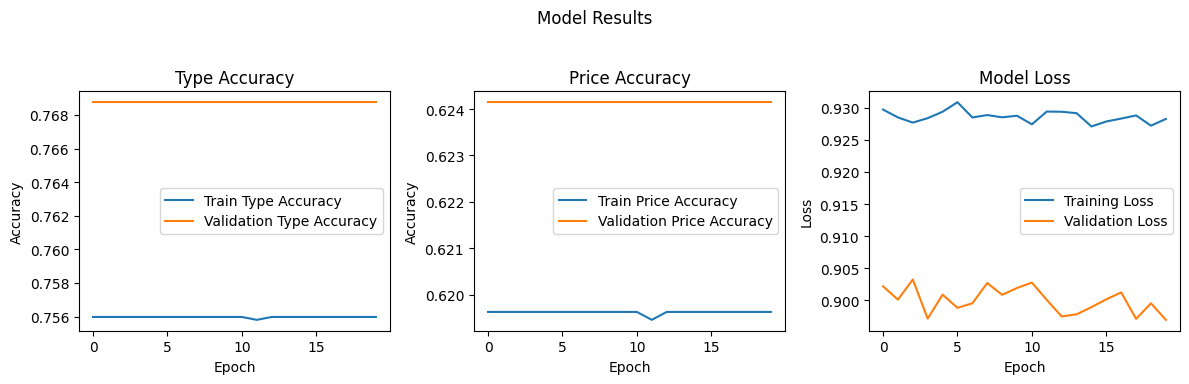

In [ ]:
results_viz(history)

**trail 2**

**Trial 3 LSTM**

In [ ]:
from tensorflow.keras.layers import Layer

class ConcatenateLayer(Layer):
    def __init__(self, axis=-1, **kwargs):
        super().__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.concat(inputs, axis=self.axis)

In [ ]:
# Define the custom concatenation layer
concatenate_layer = ConcatenateLayer()

# Fusion: combining both
fused = concatenate_layer([out, flattened])


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Custom Concatenate Layer
class ConcatenateLayer(Layer):
    def __init__(self, axis=-1, **kwargs):
        super().__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.concat(inputs, axis=self.axis)

# Define input tensors
input_text = Input(shape=(None,), dtype='int32', name='summary')
input_image = Input(shape=(64, 64, 2), name='image')

# Text part: embedding and LSTM
embedded = Embedding(input_dim=40000, output_dim=128)(input_text)
out = SpatialDropout1D(0.2)(embedded)
out = LSTM(256, dropout=0.2)(out)

# Image part: Convolution and pooling
cov = Conv2D(64, (16, 16))(input_image)
pl = MaxPool2D((12, 12))(cov)
flattened = Flatten()(pl)

# Fusion: combining both using the custom layer
concatenate_layer = ConcatenateLayer()
fused = concatenate_layer([out, flattened])

# Multi-task learning outputs
len_type = 24  # Number of classes for 'type'
len_price = 3  # Number of classes for 'price'
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# Define model
model = Model(
    inputs={
        'summary': input_text,
        'image': input_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)

# Compile the model
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,
    },
    metrics={
        'type': ['sparse_categorical_accuracy'],
        'price': ['sparse_categorical_accuracy'],
    }
)

# Show model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ summary             │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image (InputLayer)  │ (None, 64, 64, 2) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 128) │  5,120,000 │ summary[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 49, 49,    │     32,832 │ image[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_4 │ (None, None, 128) │          0 │ embedding_3[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 4, 4, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 256)       │    394,240 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1024)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_layer_4 │ (None, 1280)      │          0 │ lstm_3[0][0],     │
│ (ConcatenateLayer)  │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      3,843 │ concatenate_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type (Dense)        │ (None, 24)        │     30,744 │ concatenate_laye… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,581,659 (21.29 MB)

 Trainable params: 5,581,659 (21.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Adjusting the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_price_loss',  # Make sure this is the correct name of the loss metric to monitor
    mode='min',  # Minimize loss
    patience=5,
    verbose=1
)

# Fit the model with the updated callback
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price
    },
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 957ms/step - loss: 0.9385 - price_sparse_categorical_accuracy: 0.6200 - type_sparse_categorical_accuracy: 0.7552 - val_loss: 0.8979 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_price_loss` which is not available. Available metrics are: loss,price_sparse_categorical_accuracy,type_sparse_categorical_accuracy,val_loss,val_price_sparse_categorical_accuracy,val_type_sparse_categorical_accuracy
  current = self.get_monitor_value(logs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 144s 983ms/step - loss: 0.9436 - price_sparse_categorical_accuracy: 0.6176 - type_sparse_categorical_accuracy: 0.7549 - val_loss: 0.9018 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 974ms/step - loss: 0.9224 - price_sparse_categorical_accuracy: 0.6220 - type_sparse_categorical_accuracy: 0.7590 - val_loss: 0.9019 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - loss: 0.9191 - price_sparse_categorical_accuracy: 0.6229 - type_sparse_categorical_accuracy: 0.7606 - val_loss: 0.9036 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - loss: 0.9474 - price_sparse_categorical_accuracy: 0.6072 - type_sparse_categorical_accuracy: 0.7492 - val_loss: 0.9017 - val_price_sparse_categorical_acc

In [ ]:
# Model prediction
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)

# Extracting probabilities for each task
price_predicted = y_predict['price']
type_predicted = y_predict['type']

# Print the raw probability arrays
print("Price Prediction Probabilities:")
print(price_predicted)
print("Type Prediction Probabilities:")
print(type_predicted)

# Converting probabilities to predicted categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print("Predicted Price Categories:")
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 42s 181ms/step
Price Prediction Probabilities:
[[0.6103114  0.334161   0.05552758]
 [0.6103114  0.334161   0.05552758]
 [0.6103114  0.334161   0.05552758]
 ...
 [0.6103113  0.33416104 0.0555276 ]
 [0.6103114  0.33416098 0.05552758]
 [0.6103114  0.33416098 0.05552758]]
Type Prediction Probabilities:
[[1.5917245e-03 7.4837464e-01 3.3551820e-03 ... 5.5799593e-04
  2.1784225e-02 7.9963158e-04]
 [1.5917245e-03 7.4837464e-01 3.3551820e-03 ... 5.5799593e-04
  2.1784225e-02 7.9963158e-04]
 [1.5917245e-03 7.4837464e-01 3.3551820e-03 ... 5.5799593e-04
  2.1784225e-02 7.9963158e-04]
 ...
 [1.5917245e-03 7.4837464e-01 3.3551820e-03 ... 5.5799593e-04
  2.1784225e-02 7.9963158e-04]
 [1.5917245e-03 7.4837464e-01 3.3551820e-03 ... 5.5799593e-04
  2.1784220e-02 7.9963158e-04]
 [1.5917245e-03 7.4837464e-01 3.3551820e-03 ... 5.5799593e-04
  2.1784220e-02 7.9963158e-04]]
Predicted Price Categories:
[0 0 0 ... 0 0 0]


In [ ]:
d=pd.DataFrame(
    {'id': df2.id,
     'price': price_category_predicted}
).to_csv('LSTM.csv', index=False)

**Trail 3 GRU**

In [ ]:
from tensorflow.keras.utils import to_categorical
X=df['summary'].values
# converting the label to one hot encoded vector
y=to_categorical(df['price'].values)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, GRU, Dense


model = Sequential()
model.add(Embedding(input_dim=40000, output_dim=128))
model.add(SpatialDropout1D(0.2))
model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.build(input_shape=(None, max_length))

# Now print the summary
print(model.summary())


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 214, 128)       │     5,120,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ (None, 214, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 100)            │        69,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,189,303 (19.80 MB)

 Trainable params: 5,189,303 (19.80 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)

In [ ]:
epochs = 5
batch_size = 32
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 47s 248ms/step - accuracy: 0.6165 - loss: 244703040.0000 - val_accuracy: 0.6250 - val_loss: 0.8374
Epoch 2/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step - accuracy: 0.6310 - loss: 0.7841 - val_accuracy: 0.6088 - val_loss: 0.8373
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 74s 217ms/step - accuracy: 0.6750 - loss: 0.7120 - val_accuracy: 0.5974 - val_loss: 0.8359
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.7342 - loss: 0.6338 - val_accuracy: 0.5990 - val_loss: 0.8583
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 37s 181ms/step - accuracy: 0.7453 - loss: 978406211584.0000 - val_accuracy: 0.5860 - val_loss: 0.8495


In [ ]:
model.evaluate(X_test,Y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5361 - loss: 0.8784


[0.8563770651817322, 0.5795620679855347]

as we see the model overfitt

**trail 4   using bidirectional lstm**

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=40000, output_dim=32))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(5, dropout=0.6, recurrent_dropout=0.4)))
model.add(Dense(3, activation='softmax'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.build(input_shape=(None, max_length))

print(model.summary())

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 214, 32)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_15            │ (None, 214, 32)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 10)             │         1,520 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,565 (4.89 MB)

 Trainable params: 1,281,565 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
epochs = 5
batch_size = 32
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 25s 114ms/step - accuracy: 0.3150 - loss: 1.1256 - val_accuracy: 0.3182 - val_loss: 0.9823
Epoch 2/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.5144 - loss: 0.9563 - val_accuracy: 0.6234 - val_loss: 0.8811
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 40s 119ms/step - accuracy: 0.6353 - loss: 0.8686 - val_accuracy: 0.6234 - val_loss: 0.8416
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.6293 - loss: 0.8441 - val_accuracy: 0.6234 - val_loss: 0.8300
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.6279 - loss: 0.8287 - val_accuracy: 0.6234 - val_loss: 0.8285


In [ ]:
model.evaluate(X_test,Y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5839 - loss: 0.8481


[0.8349438309669495, 0.6087591052055359]

unfortunately we have the same results

**trail 5 using CNN**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Define the model
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', input_shape=(64,64, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# add the dropout to handle overfitting
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# add the dropout to handle overfitting
model.add(Dropout(rate=0.1))
model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
# add the dropout to handle overfitting
model.add(Dropout(rate=0.2))
model.add(Dense(units=3, activation='softmax'))

adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,723 (1.51 MB)

 Trainable params: 394,723 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
batch_size = 64
history = model.fit(x_train_image, y, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6203 - loss: 1.0973 - val_accuracy: 0.6511 - val_loss: 1.0928
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6300 - loss: 1.0918 - val_accuracy: 0.6511 - val_loss: 1.0871
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6224 - loss: 1.0867 - val_accuracy: 0.6511 - val_loss: 1.0815
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6095 - loss: 1.0821 - val_accuracy: 0.6511 - val_loss: 1.0760
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6256 - loss: 1.0762 - val_accuracy: 0.6511 - val_loss: 1.0705
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6185 - loss: 1.0716 - val_accuracy: 0.6511 - val_loss: 1.0652
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6186 - loss: 1.0667 - val_accuracy: 0.6511 - val_loss: 1.0599
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6141 - loss: 1.0627 - val_accuracy: 0.6511 - v

In [ ]:
predictions = model.predict(x_test_image)

# Get the class with the highest probability for each instance
predicted_classes = np.argmax(predictions, axis=1)

#  print or return the predicted classes
print("Predicted classes:", predicted_classes)

230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 143ms/step
Predicted classes: [0 0 0 ... 0 0 0]


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

# Creating submission DataFrame
submission_df = pd.DataFrame({
    'ID': df2.id,
    'price': predicted_classes
})

# Saving to CSV
submission_df.to_csv('CNN2.csv', index=False)

have the same accuracy

**trail 6 multi objective model to predict both type and price**

In [ ]:
pip install nltk

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
# clean the text in this trial i willn't use steming or lemmatization
stop_words = set(stopwords.words("english"))
def clean_text(text):
    # convert to lowercase
    text = text.lower()

    # remove digits
    text = re.sub(r"[^\w\s]|[\d]", '', text)

    # Handle common contractions
    text = re.sub(r"n't", ' not', text)
    text = re.sub(r"'re", ' are', text)
    text = re.sub(r"'s", ' is', text)
    text = re.sub(r"'d", ' would', text)
    text = re.sub(r"'ll", ' will', text)
    text = re.sub(r"'ve", ' have', text)
    text = re.sub(r"'m", ' am', text)

    # remove single characters not part of words
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join words back into one string separated by space, and strip leading and trailing spaces
    text = ' '.join(tokens).strip()

    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a4/a4/train_xy.csv')

# drop the null this trial
train.dropna(subset=['summary'],inplace=True)
train['summary']=train.summary.apply(clean_text)
MAX_NB_WORDS = 40000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train2.summary.values)
text_in = tokenizer.texts_to_sequences(train2.summary.values)
text_in= pad_sequences(text_in, maxlen=MAX_SEQUENCE_LENGTH)
# load the image in gray scale
train_image = np.array([load_image(i) for i in tqdm(train2.image)])


  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
label=train['price'].values

In [ ]:
# define inputs
in_text = Input(shape=(None,), dtype='int32')
in_image = Input(shape=(64, 64, 2))

# Text part - using an embedding layer and reducing mean with Lambda
embedded = Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM)(in_text)
averaged = Lambda(lambda x: tf.reduce_mean(x, axis=1))(embedded)

# Image part - using simple convolutions and pooling
cov1 = Conv2D(10, (15, 15), activation='relu')(in_image)
con_drop = Dropout(0.2)(cov1)
pl = MaxPooling2D((10, 10))(con_drop)
flattened = Flatten()(pl)

# Fusion - combining both with a Lambda layer
fused = Lambda(lambda x: tf.concat(x, axis=-1))([averaged, flattened])

# Multi-task learning
p_price = Dense(3, activation='softmax', name='price')(fused)

# Define model input/output using keys
model = Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
    }
)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'price': ['sparse_categorical_accuracy'],
    }
)

# Print model summary to verify setup
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py:112: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'summary' mapping to value <KerasTensor shape=(None, None), dtype=int32, sparse=None, name=keras_tensor_96> which has name 'keras_tensor_96'. Change the tensor name to 'summary' (via `Input(..., name='summary')`)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py:112: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'image' mapping to value <KerasTensor shape=(None, 64, 64, 2), dtype=float32, sparse=None, name=keras_tensor_97> which has name 'keras_tensor_97'. Change the tensor name to 'image' (via `Input(..., name='image')`)
  warnings.warn(


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 64, 64, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 50, 50,    │      4,510 │ input_layer_8[0]… │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 50, 50,    │          0 │ conv2d_6[0][0]    │
│                     │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 100) │  4,000,000 │ input_layer_7[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 5, 5, 10)  │          0 │ dropout_4[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 100)       │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 250)       │          0 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 350)       │          0 │ lambda_1[0][0],   │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ price (Dense)       │ (None, 3)         │      1,053 │ lambda_2[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,005,563 (15.28 MB)

 Trainable params: 4,005,563 (15.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x={
        'summary':text_in,
        'image': train_image
    },
    y={
        'price': label,
    },
    epochs=5,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - loss: 0.9614 - sparse_categorical_accuracy: 0.6138 - val_loss: 0.8414 - val_sparse_categorical_accuracy: 0.6241
Epoch 2/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.8302 - sparse_categorical_accuracy: 0.6300 - val_loss: 0.8343 - val_sparse_categorical_accuracy: 0.6241
Epoch 3/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.8331 - sparse_categorical_accuracy: 0.6257 - val_loss: 0.8288 - val_sparse_categorical_accuracy: 0.6241
Epoch 4/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - loss: 0.8345 - sparse_categorical_accuracy: 0.6191 - val_loss: 0.8239 - val_sparse_categorical_accuracy: 0.6241
Epoch 5/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.8280 - sparse_categorical_accuracy: 0.6210 - val_loss: 0.8193 - val_sparse_categorical_accuracy: 0.6241


In [ ]:
# prepare the test data
test=pd.read_csv('/kaggle/input/cisc-873-dm-w24-a4/a4/test_x.csv')
# test['summary']=test['summary'].apply(detect_and_translate)
test['summary']=test.summary.apply(clean_text)
text_test = tokenizer.texts_to_sequences(test.summary.values)
text_test= pad_sequences(text_test, maxlen=MAX_SEQUENCE_LENGTH)

test_image = np.array([load_image(i) for i in tqdm(test.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
y_predict = model.predict(
    {
        'summary': text_test,
        'image':test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step
[[0.6666959  0.29149106 0.04181299]
 [0.70424074 0.26426208 0.03149725]
 [0.6872831  0.27457613 0.03814071]
 ...
 [0.7025464  0.27010113 0.02735244]
 [0.65423113 0.29743013 0.04833874]
 [0.646753   0.30384955 0.04939732]]
[0 0 0 ... 0 0 0]


In [ ]:
pd.DataFrame(
    {'id': test.id,
     'price': price_category_predicted}
).to_csv('transferlaerning.csv', index=False)

**reference**
https://github.com/sondosm2/Airbnb-price-category-prediction/blob/main/assignment%204%20data_mining%20(1).ipynb

 #  Questions

  ## Q1 )-Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

Fully-connected models might not be the best option for sequential data since they don't take the temporal dependencies between data points into account. Models that are able to depict the temporal relationships between data points are necessary for sequential data, such as time series or natural language. Put another way, because they can process data sequentially and retain memory of prior inputs, recurrent neural networks (RNNs) and their derivatives, such as long short-term memory (LSTM) and gated recurrent unit (GRU) networks, are better suited for sequential data.

Additionally, it is not a good idea to use fully-connected models on picture data because to the enormous number of parameters that must be estimated, which almost always results in overfitting.(br>
Using fully-connected models, which presume spatial locality and parameter sharing, following convolutional layers' output is a superior way to handle the picture data.Convolutional neural networks (CNNs) are therefore a well-liked option for image processing tasks due to their ability to automatically learn to extract pertinent information from images. Nevertheless, CNNs can also classify the collected characteristics using fully-connected layers.

## Q2) What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

The back propagation approach used in deep neural networks with many layers allows the network to learn by multiplying several gradients with each other. This might result in the vanishing gradient problem, which arises when the gradients of the loss function get very small as they go through the layers. Because of this, the network may find it challenging to pick up useful features, particularly in the early layers. even though When gradients get extremely huge and make the network unstable, it is known as the "exploding gradient problem."

In order to address these issues, gating techniques that regulate information flow within the network are incorporated into the architecture of LSTM and GRU networks. In order to preserve long-term dependencies in the data, these gating mechanisms enable the network to selectively remember or forget information from earlier time steps in the input sequence.

## Q3)What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?

A shared model is used to complete several learning problems simultaneously in a process known as multi-task learning (MTL). MTL aims to increase task performance by taking advantage of the similarities and differences between each individual task. MTL can lessen overfitting and enhance the model's generalization performance by distributing the learnt features and parameters among the tasks. Additionally, a constrained problem is by nature multi-objective since competing objectives may force a trade-off.

A single neural network can be trained to simultaneously recognize many items in an image as an example of multi-objective learning in deep learning. This technique is used in object identification and picture categorization. Another illustration is natural language processing, where a single neural network may be trained to carry out a variety of related functions like named entity recognition, sentiment analysis, and language modeling.

The goal of multimodal machine learning is to create models that can relate and handle data from several modalities.

In this assignment, we utilize both of them. Firstly, we employ multimodality to process text and images in the same model; RNN variants process text input, while CNN processes images.
and for multi-objective learning, we developed a model that can forecast the listing's kind and price range.


## Q4)What is the difference among xgboost, lightgbm and catboost?

Popular gradient boosting libraries for supervised machine learning applications like regression and classification include LightGBM, CatBoost, and XGBoost. The three libraries are not the same, despite the fact that they all use gradient boosting techniques.

Extreme Gradient Boosting, or XGBoost, is renowned for its scalability and efficiency. XGBoost supports a number of goal functions and regularization strategies and operates on a regularized gradient boosting architecture. Moreover, early stopping to avoid overfitting and handling missing data are integrated into the system.

Scalability, performance, and speed are highlights of XGBoost. XGBoost helps with fast and effective model training, especially on big datasets with plenty of characteristics, by expanding decision trees level-by-level.

for XGBoost we must handle the categorical data.

LightGBM, however, is renowned for its precision and effectiveness. With fewer trees and more optimal splits found, LightGBM can achieve improved accuracy through leaf-wise decision tree growth. Along with these characteristics, LightGBM also has data partitioning and support for categorical features, which can decrease memory utilization and increase training efficiency.

However, Yandex's CatBoost (Categorical Boosting) gradient boosting library was created specifically to handle categorical features in data. It has built-in support for processing categorical data, which can be difficult for other gradient boosting libraries, and supports both regression and classification applications.
 Advanced methods like ordered boosting are also included in CatBoost, and these can lessen overfitting and enhance generalization performance.
In contrast to XGBoost and LightGBM, which create asymmetric trees, it creates symmetric (balanced) trees. The same condition is used to separate the leaves from the preceding tree in each phase. Every node in the level uses the feature-split pair that accounts for the least amount of loss.